In [1]:
punlearn pathfinder
plist pathfinder


Parameters for /home/kjg/cxcds_param4/pathfinder.par

        infile =                  Input image
       outfile =                  Output map image
       (minval = 0)               Minimum pixel value to consider in input image.
    (direction = diagonal)        Directions to follow gradient
     (debugreg = )                Diagnostic region file
      (verbose = 1)               Tool chatter level
      (clobber = no)              Remove output file if it already exists?
         (mode = ql)              



In [1]:
/bin/rm -rf pathfinder
mkdir pathfinder
pathfinder infile=abell665.flux.asm outfile=pathfinder/path.map clob+

pathfinder
          infile = abell665.flux.asm
         outfile = pathfinder/path.map
          minval = 0
       direction = diagonal
        debugreg = 
         verbose = 1
         clobber = yes
            mode = ql



In [2]:
merge_too_small pathfinder/path.map pathfinder/path_min20px.map meth=area minval=30 clob+

In [3]:
merge_too_small  pathfinder/path_min20px.map  pathfinder/path_min20px50ts.map \
  method=counts imgfile=abell665_fill.img min=50 clob+

In [4]:
dmmaskbin abell665.flux.asm pathfinder/path_min20px50ts.map pathfinder/path.img clob+

In [5]:
### map2reg pathfinder/path.map pathfinder/path.reg
dmimggrad pathfinder/path_min20px50ts.map pathfinder/path.grad sobel mag clob+

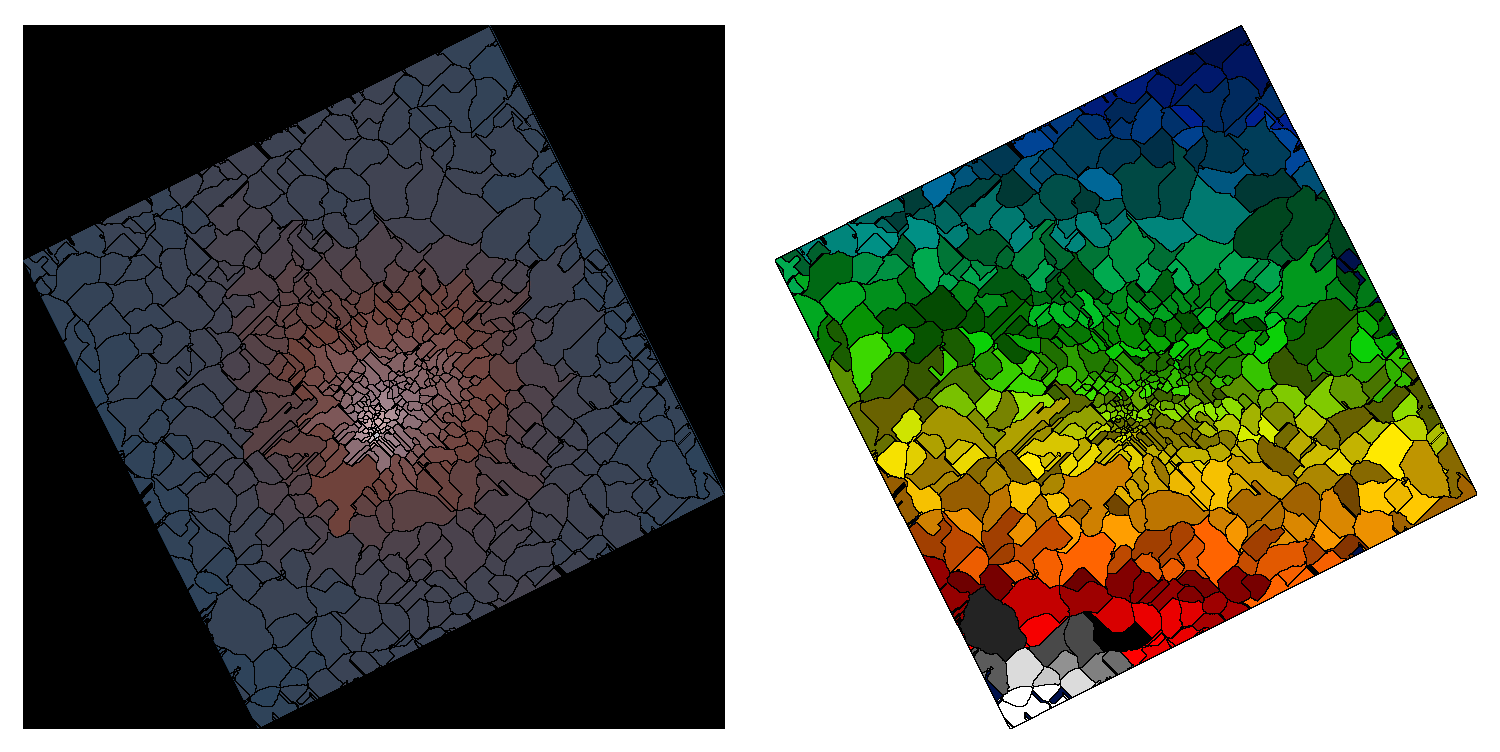

In [6]:
ds9 -geometry 1500x800 pathfinder/path.img -scale log -block to 2 -scale limits 0 2e-6 \
    -cmap load sunset-in-atlantis.sao \
    -mask color black -mask pathfinder/path.grad -nomask \
    pathfinder/path_min20px50ts.map -scale linear -scale mode minmax -zoom to 0.5 -block to 1 \
    -cmap load $ASCDS_INSTALL/contrib/data/16_ramps.lut \
    -view info no -view panner no -view magnifier no -view buttons no -view colorbar no \
    -mask color black -mask pathfinder/path.grad -nomask \
    -saveimage png pathfinder/path.png -exit

display < pathfinder/path.png

In [7]:
merge_too_small  pathfinder/path_min20px.map  pathfinder/path_min20px250ts.map \
  method=counts imgfile=abell665_fill.img min=250 clob+

In [8]:
dmmaskbin abell665.flux.asm pathfinder/path_min20px250ts.map pathfinder/path250.img clob+

In [9]:
### map2reg pathfinder/path.map pathfinder/path.reg
dmimggrad pathfinder/path_min20px250ts.map pathfinder/path250.grad sobel mag clob+

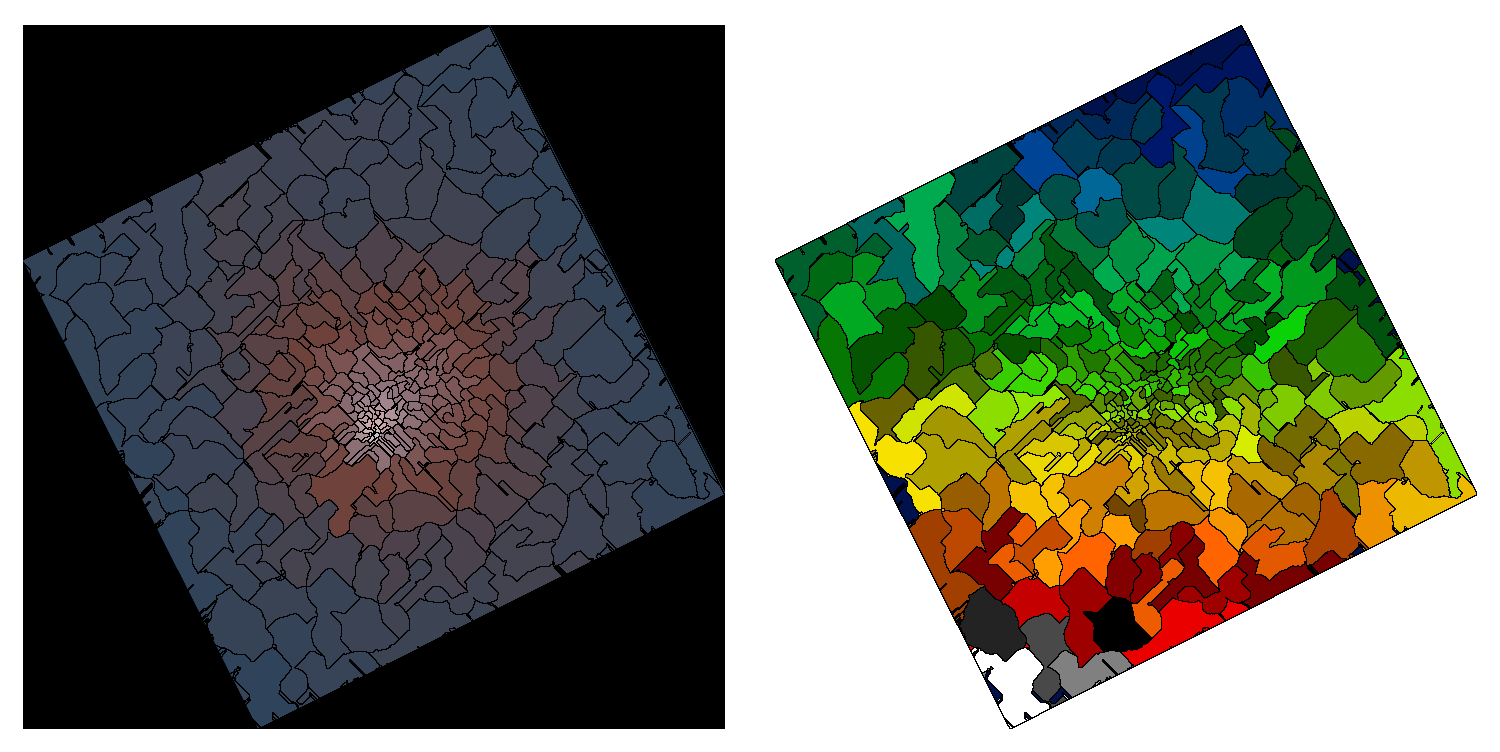

In [10]:
ds9 -geometry 1500x800 pathfinder/path250.img -scale log -block to 2 -scale limits 0 2e-6 \
    -cmap load sunset-in-atlantis.sao \
    -mask color black -mask pathfinder/path250.grad -nomask \
    pathfinder/path_min20px250ts.map -scale linear -scale mode minmax -zoom to 0.5 -block to 1 \
    -cmap load $ASCDS_INSTALL/contrib/data/16_ramps.lut \
    -view info no -view panner no -view magnifier no -view buttons no -view colorbar no \
    -mask color black -mask pathfinder/path250.grad -nomask \
    -saveimage png pathfinder/path.png -exit

display < pathfinder/path.png